In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

## 📊 What is Dataset II in Anscombe’s Quartet?

Dataset II, like the others in the Anscombe Quartet, has the **same statistical summaries** as the other datasets:
- Same mean and variance for `x` and `y`
- Same correlation coefficient (~0.816)
- Same regression line: \( y = 3 + 0.5x \)
- Same R² value (~0.67)

However, **the visual pattern is very different**. Dataset II shows a **non-linear (curved)** relationship, where the data follows a parabolic trend. This demonstrates that linear regression is not always appropriate, even when statistical metrics suggest a strong relationship.

This dataset emphasizes the importance of **visualizing the data** before applying any model.

In [2]:
df = sns.load_dataset("anscombe")
df2 = df[df['dataset'] == 'II']
df2.head()

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26


## 📈 Summary Statistics: Meaning and Importance

Despite identical statistical summaries across all datasets, Dataset II demonstrates that:
- Mean and variance only describe the **location and spread** of data, not its **shape**.
- Correlation and regression may suggest a strong linear relationship numerically, but **not visually**.

This dataset reinforces the lesson that **summary statistics are insufficient alone** to understand your data's structure.

In [3]:
print("Dataset II - Descriptive Statistics:\n")
print(df2.describe())

print("\nCorrelation (x vs y):", df2['x'].corr(df2['y']))

Dataset II - Descriptive Statistics:

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

Correlation (x vs y): 0.8162365060002428


## 📉 Scatter Plot Analysis

The scatter plot of Dataset II reveals a **non-linear (curved)** relationship between `x` and `y`. While the regression line has been fit using least squares, it poorly captures the underlying structure of the data.

This highlights:
- The need to **explore non-linear models** (like polynomial regression)
- The importance of **diagnostic plots**, not just numeric summaries

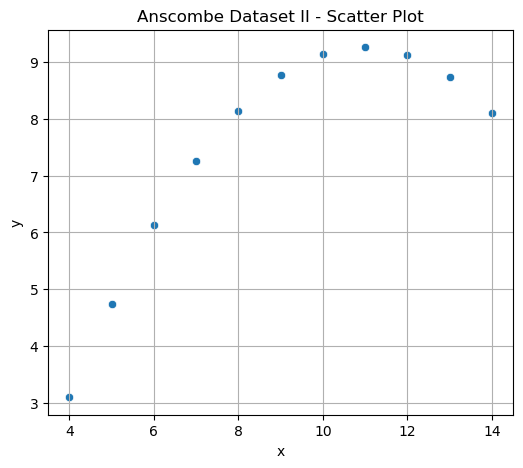

In [4]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df2, x='x', y='y')
plt.title("Anscombe Dataset II - Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## 📏 What Does the Regression Line Show for Dataset II?

Linear regression produces the same line \( y = 3 + 0.5x \) as in Dataset I. However:

- The regression line does **not fit the curve** of the data well.
- Most points deviate **systematically** from the line (especially those in the center).
- This implies that the assumption of **linearity** is violated.

This shows a key limitation of linear regression: it is only valid when the relationship between variables is approximately linear.

In [5]:
X = df2[['x']]
y = df2['y']

model = LinearRegression()
model.fit(X, y)

print("Slope (β1):", model.coef_[0])
print("Intercept (β0):", model.intercept_)
print("R² Score:", model.score(X, y))

Slope (β1): 0.5
Intercept (β0): 3.00090909090909
R² Score: 0.6662420337274844


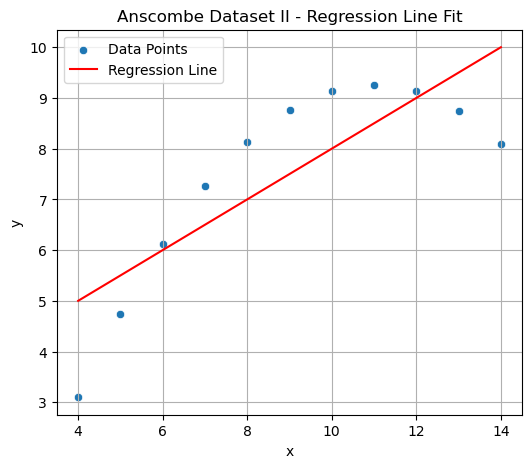

In [6]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='x', y='y', data=df2, label='Data Points')
sns.lineplot(x=df2['x'], y=model.predict(X), color='red', label='Regression Line')
plt.title("Anscombe Dataset II - Regression Line Fit")
plt.legend()
plt.grid(True)
plt.show()


## 📊 Residual Plot – Dataset II

The **residual plot** for Dataset II is highly structured — the residuals form a **parabolic pattern**.

This violates one of the core assumptions of linear regression:
> Residuals should be randomly distributed around zero.

Non-random structure in the residuals suggests that the model is **mis-specified**, and a **non-linear model** may be more appropriate.

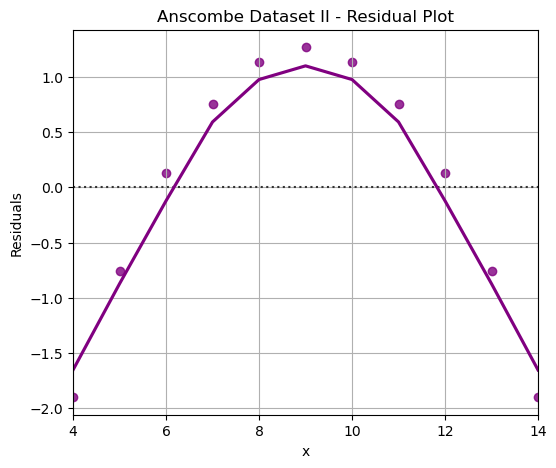

In [7]:
residuals = y - model.predict(X)
plt.figure(figsize=(6, 5))
sns.residplot(x=df2['x'], y=df2['y'], lowess=True, color="purple")
plt.title("Anscombe Dataset II - Residual Plot")
plt.xlabel("x")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

## 📚 OLS Regression Summary Interpretation (Bonus Topic)

The `statsmodels` OLS summary will look statistically "valid":
- High t-statistics for the slope and intercept
- p-values < 0.05
- R² ≈ 0.67 (suggesting decent fit)

However, this is misleading because the model:
- Violates the **linearity assumption**
- Shows strong **residual patterns**
- Cannot predict well due to **model misfit**

📌 This further emphasizes the point:
> **Always validate model assumptions visually**, even if the stats seem to suggest a good model.


In [8]:
# Step 8: OLS Regression Summary
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sat, 21 Jun 2025   Prob (F-statistic):            0.00218
Time:                        19:11:22   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.0

c:\Users\Paperchase\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
